In [56]:
from bs4 import BeautifulSoup
import requests
import selenium
from selenium import webdriver
from pathlib import Path
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service as ChromeService

In [63]:
#! pip install selenium==4.4.3

In [84]:


def scrape_coingecko_historical_data(coin='bitcoin', days='max'):

    base_url = f"https://www.coingecko.com/en/coins/{coin}/historical_data?start=2018-01-01&end=2023-08-09#panel"
    CHROMEDRIVER_PATH = "/Applications/chromedriver_mac_arm64/chromedriver"

    options = webdriver.ChromeOptions()
    service = ChromeService(executable_path=CHROMEDRIVER_PATH)
    browser = webdriver.Chrome(service=service, options=options)

    browser.get(base_url)
    browser.implicitly_wait(15)
    page_source = browser.page_source
    browser.quit()
    print(page_source)
    # Utiliser BeautifulSoup pour analyser le contenu
    soup = BeautifulSoup(page_source, 'html.parser')
    
    # Trouver la table contenant les données historiques
    table = soup.find('table', {'class': 'table'})
    
    # Récupérer les en-têtes de colonnes
    headers = [header.get_text(strip=True) for header in table.find_all('th')]
    
    # Récupérer les données de chaque ligne
    rows = table.find_all('tr')[1:]  # Exclure la première ligne (en-têtes)
    data = []
    for row in rows:
        values = [value.get_text(strip=True) for value in row.find_all('td')]
        data.append(dict(zip(headers, values)))
    
    return data
    

<html lang="en-US" class="lang-en"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><link href="/cdn-cgi/styles/challenges.css" rel="stylesheet"><script src="/cdn-cgi/challenge-platform/h/g/orchestrate/chl_page/v1?ray=7f3ffe3e08ba01bf"></script><script src="https://challenges.cloudflare.com/turnstile/v0/g/74ac0d47/api.js?onload=aJ4&amp;render=explicit" async="" defer="" crossorigin="anonymous"></script></head><body class="no-js"><div class="main-wrapper" role="main"><div class="main-content"><h1 class="zone-name-title h1"><img src="/favicon.ico" class="heading-favicon" alt="Icon for www.coingecko.com">www.coingecko.com</h1><h2 id="challenge-running" class="h2">Checking if the site connection is secure</h2><div id="challenge-stage"></div><div id="challenge-spinner" cla
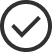

AttributeError: 'NoneType' object has no attribute 'find_all'

In [85]:
data = scrape_coingecko_historical_data()